# Spatial Transformations - Convolution and Correlation

## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

## Image Loading and Built-in Grayscale Conversion

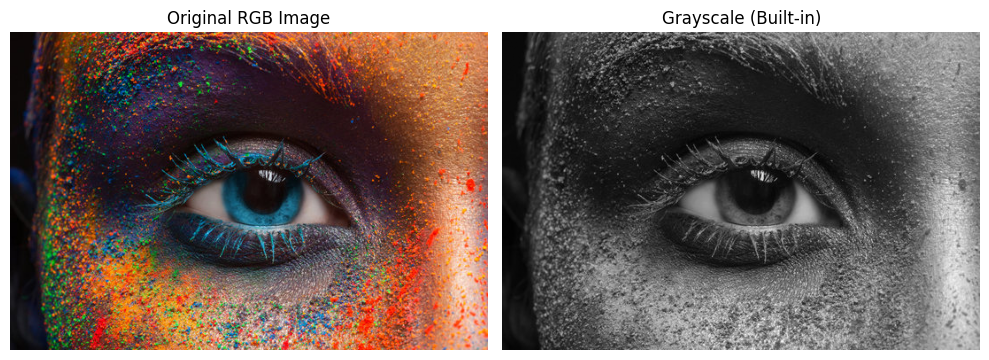

In [2]:
image = cv2.imread('../lab3/sample.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original RGB Image')
plt.axis('off')

gray_builtin = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray_builtin, cmap='gray')
plt.title('Grayscale (Built-in)')
plt.axis('off')
plt.tight_layout()
plt.show()

## User-defined Grayscale Conversion

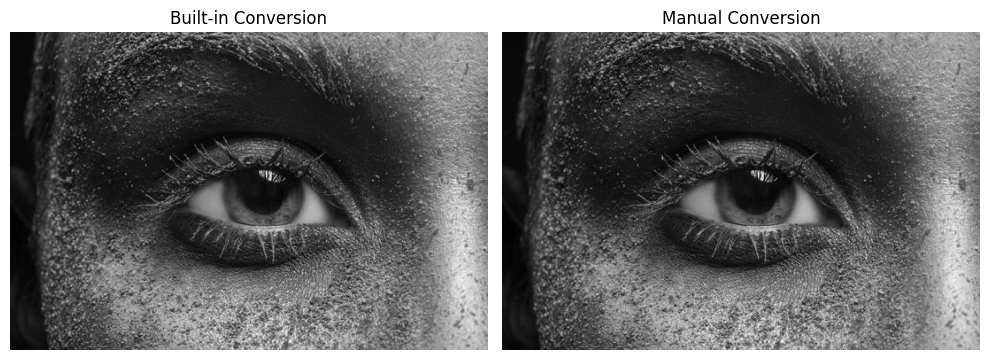

In [3]:
def rgb_to_grayscale(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

gray_manual = rgb_to_grayscale(rgb_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_builtin, cmap='gray')
plt.title('Built-in Conversion')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_manual, cmap='gray')
plt.title('Manual Conversion')
plt.axis('off')
plt.tight_layout()
plt.show()

## Define Kernels and Convolution Function

In [4]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sharpening = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]], dtype=np.float32)

def convolution_2d(image, kernel):
    kernel_h, kernel_w = kernel.shape
    pad_h, pad_w = kernel_h // 2, kernel_w // 2
    
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_img[i:i+kernel_h, j:j+kernel_w] * kernel)
    
    return output

## Apply Convolution with Edge Detection and Sharpening

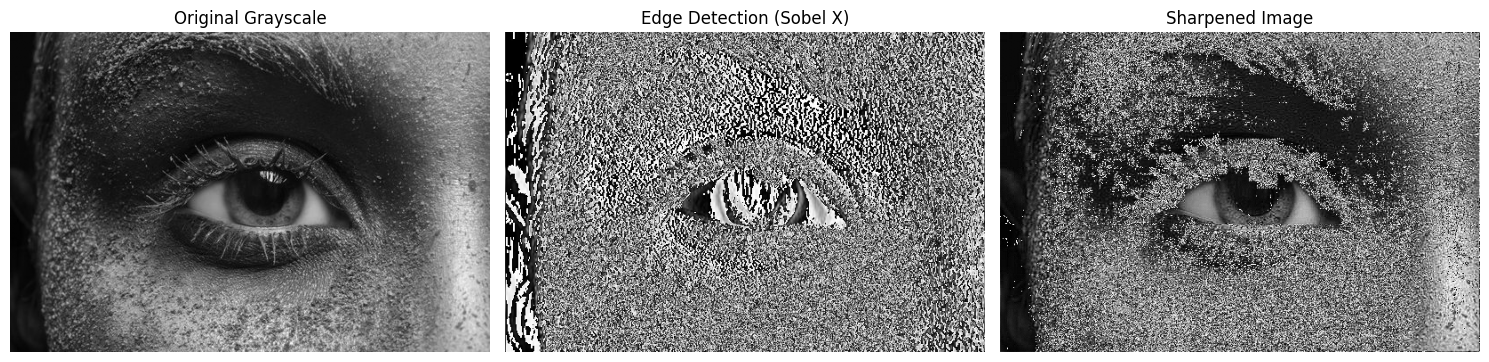

In [5]:
edge_detected = convolution_2d(gray_builtin, sobel_x)
sharpened = convolution_2d(gray_builtin, sharpening)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_builtin, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edge_detected, cmap='gray')
plt.title('Edge Detection (Sobel X)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.tight_layout()
plt.show()

## Define Correlation Function

In [6]:
def correlation_2d(image, kernel):
    kernel_h, kernel_w = kernel.shape
    pad_h, pad_w = kernel_h // 2, kernel_w // 2
    
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_img[i:i+kernel_h, j:j+kernel_w] * np.flip(kernel))
    
    return output

## Apply Correlation on Images

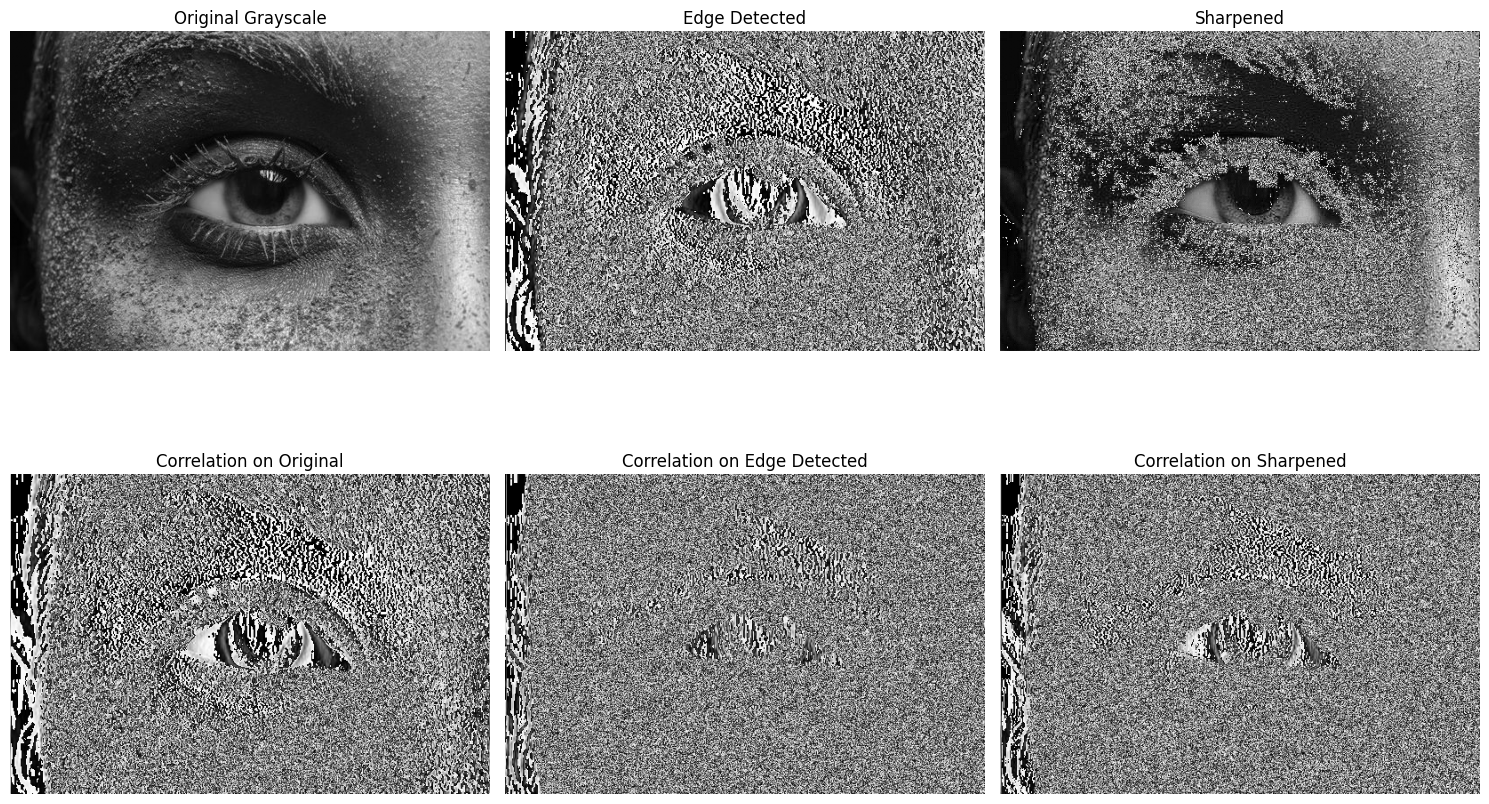

In [7]:
corr_gray = correlation_2d(gray_builtin, sobel_x)
corr_edge = correlation_2d(edge_detected, sobel_x)
corr_sharp = correlation_2d(sharpened, sobel_x)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(gray_builtin, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edge_detected, cmap='gray')
plt.title('Edge Detected')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(corr_gray, cmap='gray')
plt.title('Correlation on Original')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(corr_edge, cmap='gray')
plt.title('Correlation on Edge Detected')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(corr_sharp, cmap='gray')
plt.title('Correlation on Sharpened')
plt.axis('off')
plt.tight_layout()
plt.show()

## Gaussian Blur and Enhanced Edge Detection

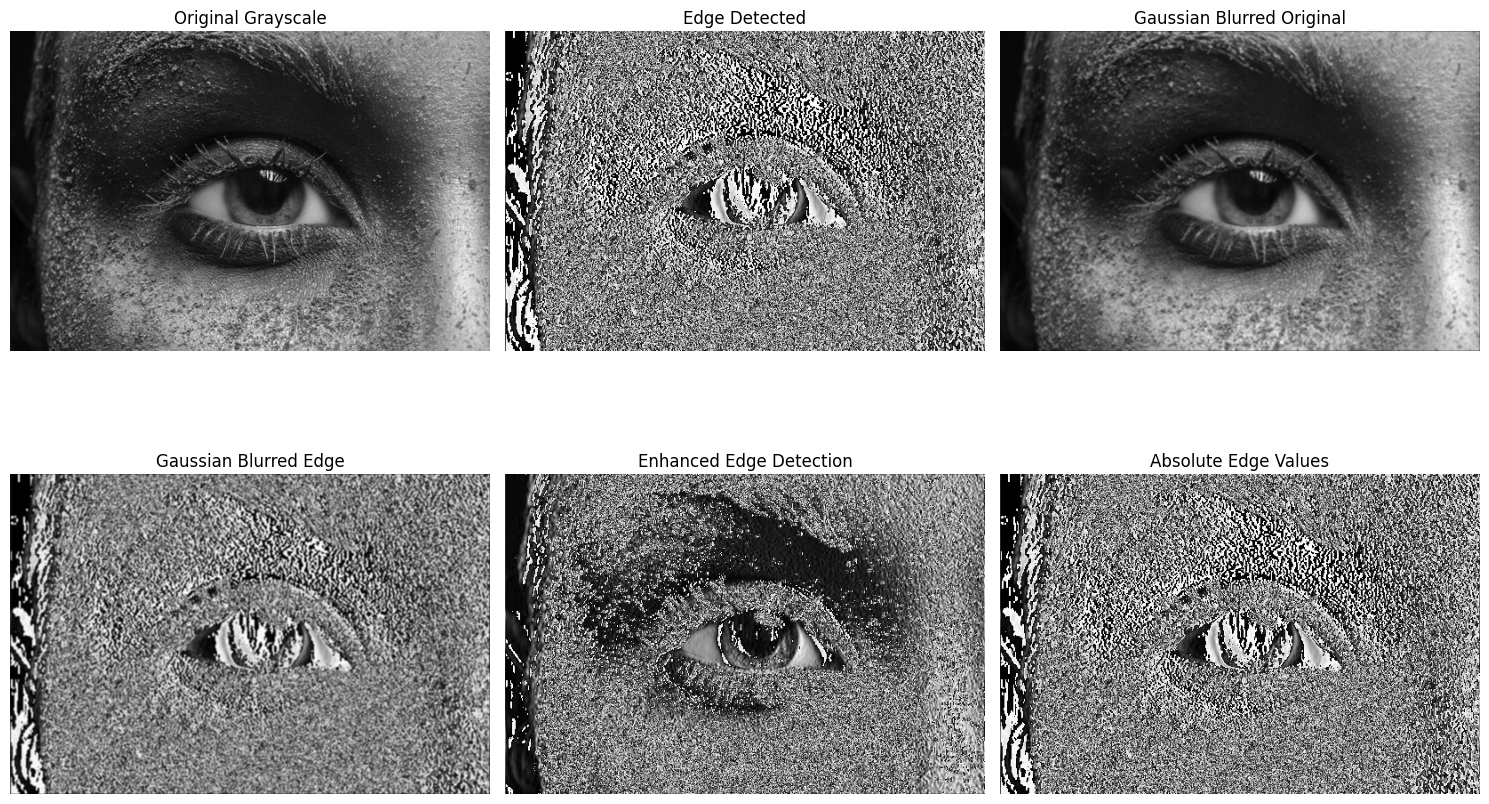

In [8]:
gaussian_kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]], dtype=np.float32) / 16

blurred_original = convolution_2d(gray_builtin, gaussian_kernel)
blurred_edge = convolution_2d(edge_detected, gaussian_kernel)

enhanced_edge = np.abs(edge_detected) + blurred_original

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(gray_builtin, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edge_detected, cmap='gray')
plt.title('Edge Detected')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(blurred_original, cmap='gray')
plt.title('Gaussian Blurred Original')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(blurred_edge, cmap='gray')
plt.title('Gaussian Blurred Edge')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(enhanced_edge, cmap='gray')
plt.title('Enhanced Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(np.abs(edge_detected), cmap='gray')
plt.title('Absolute Edge Values')
plt.axis('off')
plt.tight_layout()
plt.show()

## Analysis and Comparison

Convolution vs Correlation Analysis:
1. Sobel X filter detects vertical edges by highlighting intensity changes
2. Sharpening filter enhances image details and makes edges more prominent
3. Correlation produces similar results to convolution but with flipped kernel
4. Gaussian blur smooths the image reducing noise and fine details
5. Enhanced edge detection combines smooth background with sharp edge information


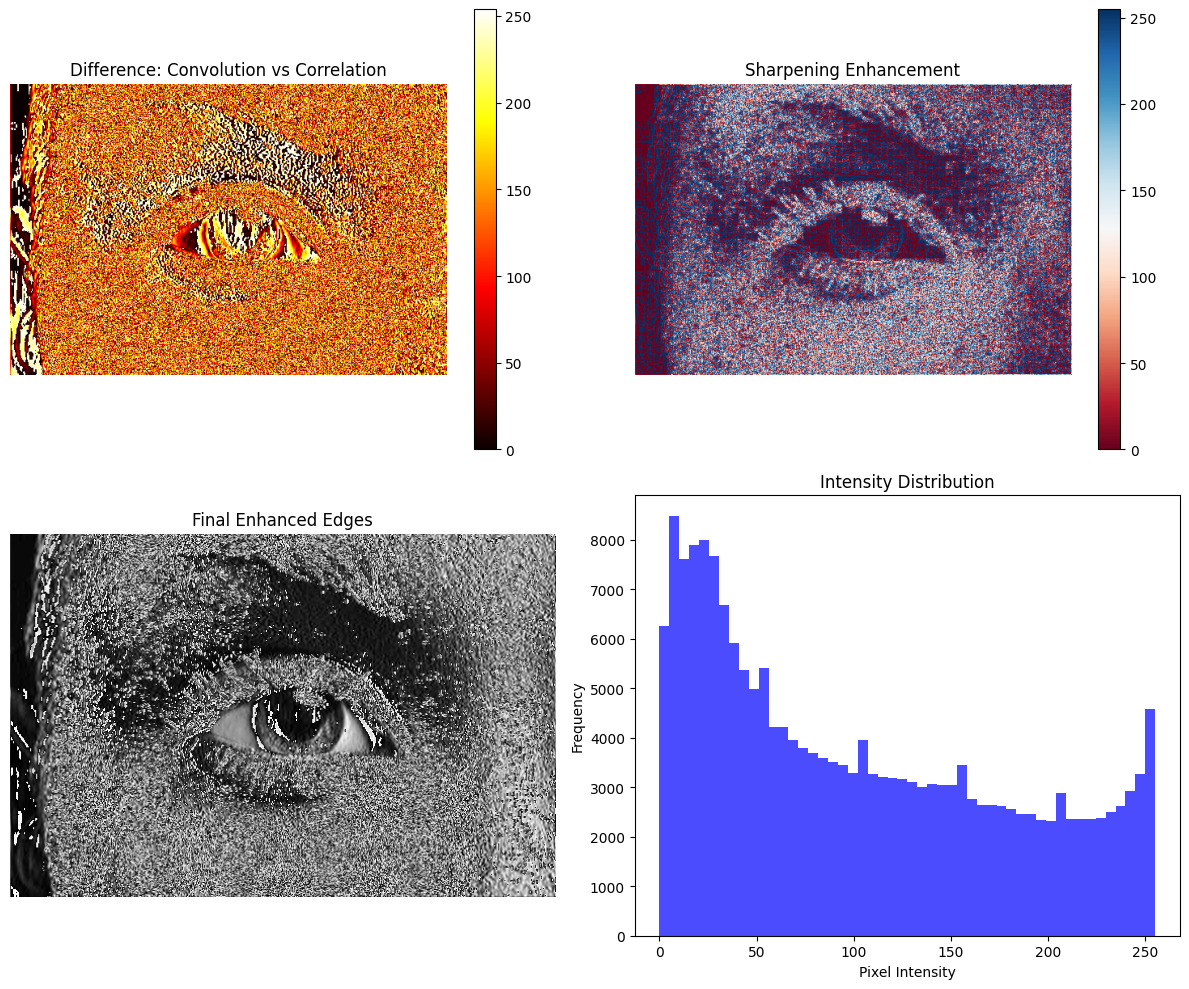

In [9]:
print("Convolution vs Correlation Analysis:")
print("1. Sobel X filter detects vertical edges by highlighting intensity changes")
print("2. Sharpening filter enhances image details and makes edges more prominent")
print("3. Correlation produces similar results to convolution but with flipped kernel")
print("4. Gaussian blur smooths the image reducing noise and fine details")
print("5. Enhanced edge detection combines smooth background with sharp edge information")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

im1 = axes[0,0].imshow(np.abs(edge_detected - corr_gray), cmap='hot')
axes[0,0].set_title('Difference: Convolution vs Correlation')
axes[0,0].axis('off')
plt.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(sharpened - gray_builtin, cmap='RdBu')
axes[0,1].set_title('Sharpening Enhancement')
axes[0,1].axis('off')
plt.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(enhanced_edge, cmap='gray')
axes[1,0].set_title('Final Enhanced Edges')
axes[1,0].axis('off')

axes[1,1].hist(enhanced_edge.flatten(), bins=50, alpha=0.7, color='blue')
axes[1,1].set_title('Intensity Distribution')
axes[1,1].set_xlabel('Pixel Intensity')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()